In [1]:
# import
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [20]:
# import a file
#raw_data = pd.read_csv("./Messungen20200716/hochzaehlenspalte3.txt")
#raw_data = pd.read_csv("./Messungen20200716/musikA.txt")
#raw_data = pd.read_csv("./Messungen20200716/300Hz.txt")

# Algemiene Datenauswertung
Fehler in der Datei finden

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205000 entries, 0 to 204999
Data columns (total 7 columns):
ch0    205000 non-null int64
ch1    205000 non-null int64
ch2    205000 non-null int64
ch3    205000 non-null int64
ch4    205000 non-null int64
ch5    205000 non-null int64
us     205000 non-null int64
dtypes: int64(7)
memory usage: 10.9 MB


In [4]:
def check_same_number(array, number):
    result = array - number
    max_value = max(result)
    min_value = min(result)
    return [result, max_value, min_value]

In [5]:
raw_data.ch0

0         10091773
1         10091773
2         10091773
3         10091773
4         10091773
            ...   
204995    10091773
204996    10091773
204997    10091773
204998    10091773
204999    10091773
Name: ch0, Length: 205000, dtype: int64

In [6]:
[result, max_value, min_value] = check_same_number(raw_data.ch0, 10091773)
print("Max: "+str(max_value))
print("Min: "+str(min_value))
result

num_of_wrong = 0
for i in range(0, len(result)):
  if (result[i] != 0):
    num_of_wrong = num_of_wrong + 1
    
print("Anzhal der falsch übertragenen Daten: "+str(num_of_wrong))
print("Anteil an den gesamten Daten: "+ str((num_of_wrong/len(result))*100) + "%")

Max: 0
Min: 0
Anzhal der falsch übertragenen Daten: 0
Anteil an den gesamten Daten: 0.0%


In [7]:
raw_data.ch1

0         10091774
1         10091774
2         10091774
3         10091774
4         10091774
            ...   
204995    10091774
204996    10091774
204997    10091774
204998    10091774
204999    10091774
Name: ch1, Length: 205000, dtype: int64

In [8]:
[result, max_value, min_value] = check_same_number(raw_data.ch1, 10091774)
print("Max: "+str(max_value))
print("Min: "+str(min_value))
result

num_of_wrong = 0
for i in range(0, len(result)):
  if (result[i] != 0):
    num_of_wrong = num_of_wrong + 1
    
print("Anzhal der falsch übertragenen Daten: "+str(num_of_wrong))
print("Anteil an den gesamten Daten: "+ str((num_of_wrong/len(result))*100) + "%")

Max: 0
Min: -589824
Anzhal der falsch übertragenen Daten: 4
Anteil an den gesamten Daten: 0.001951219512195122%


In [9]:
def check_counter(array):
    wrong_count = 0
    last_number = array[0]
    distance = np.zeros(len(array))
    
    for i in range(1,len(array)):
        diff = array[i] - last_number
        last_number = array[i]
        if diff != 1:
            wrong_count = wrong_count + 1
        distance[i] = diff
        #print(diff)
    return [wrong_count, distance]

Anzahl Unterbrechungen: 0


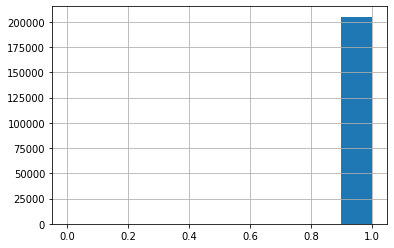

In [10]:
[wrong_count, distance] = check_counter(raw_data.ch2)
print("Anzahl Unterbrechungen: " + str(wrong_count))
dis = pd.Series(distance)
dis.hist()

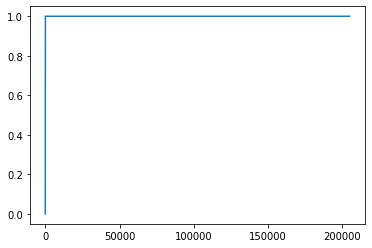

In [11]:
plt.plot(dis)
plt.show()

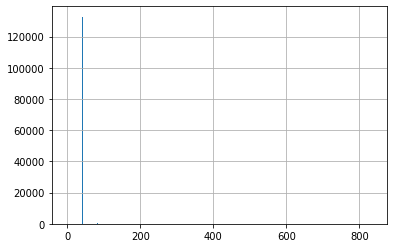

In [27]:
[wrong_count, distance] = check_counter(raw_data.us)
dis = pd.Series(distance)
dis.hist(bins=1000)


# in Audio Konvertieren

In [14]:
def convert_to_real_audio(data, filename):
    output_file = open(filename, 'w')
    output_array = np.zeros(len(data))
    for i in range(0,len(data)):
        number = int(data[i])
        n = number & 0xffffff
        number =  n | (-(n & 0x400000))
        output_file.write(str(number)+'\n')
        output_array[i] = number
    output_file.close()
    return(output_array)
        

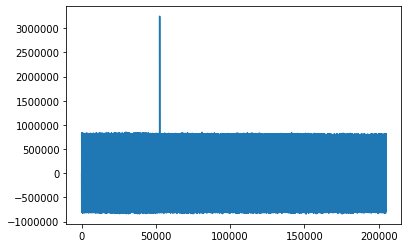

In [21]:
output = convert_to_real_audio(raw_data.ch3, "300Hz_ch3.txt")
plt.plot(output)
plt.show()